# Linear Regression

In this jupyter notebook you will find the implementation of the linear regression algorithm using the sklearn library. It will help to test this algorithm and to complete [forecasting.md](https://github.com/Hurence/historian/blob/forecasting/docs/forecasting.md) document.

In [1]:
import time
import sklearn.linear_model as sk
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

#### 1) Load and prepare the dataset

For this step we will use pandas library which allow us to read easily a csv file and then create a dataFrame from this file.

In [2]:
# Load the dataset
# ts_data = pd.read_csv('../data/dataHistorian.csv', sep=';')
ts_data = pd.read_csv('../data/it-data-4metrics.csv', sep=',')

ts_data.head()

,metric_id,timestamp,value,metric_name,warn,crit,min,max
0,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157723,13.375,cpu_prct_used,85.0,95.0,NaN,NaN
1,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157423,13.500,cpu_prct_used,85.0,95.0,NaN,NaN
2,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157123,13.375,cpu_prct_used,85.0,95.0,NaN,NaN
3,091c334c-a90a-4d8f-ba75-2c936220cd64,1575156823,13.500,cpu_prct_used,85.0,95.0,NaN,NaN
4,091c334c-a90a-4d8f-ba75-2c936220cd64,1575156523,13.750,cpu_prct_used,85.0,95.0,NaN,NaN


Now we have our dataFrame with all the information, but some ones are useless. We want to keep only the useful data to reduce calculations' cost.

In [3]:
# Delete the useless columns
ts_data = ts_data.iloc[:,0:4]
ts_data.head()

,metric_id,timestamp,value,metric_name
0,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157723,13.375,cpu_prct_used
1,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157423,13.500,cpu_prct_used
2,091c334c-a90a-4d8f-ba75-2c936220cd64,1575157123,13.375,cpu_prct_used
3,091c334c-a90a-4d8f-ba75-2c936220cd64,1575156823,13.500,cpu_prct_used
4,091c334c-a90a-4d8f-ba75-2c936220cd64,1575156523,13.750,cpu_prct_used


We will now split the data according to the different metric_name and then according the different metric_id.  
For that, we will create a dictionnary where the metric_name are the keys and they have lists of their metric_id.

In [4]:
# Creation of the dictionnary of all the metric_name in association with their metric_id
dic_name = {}
dic_id = {}
for indx in ts_data.index:
    if ts_data['metric_name'][indx] not in dic_name.keys():
        dic_name[ts_data['metric_name'][indx]] = []
    if ts_data['metric_id'][indx] not in dic_name[ts_data['metric_name'][indx]]:
        dic_name[ts_data['metric_name'][indx]].append(ts_data['metric_id'][indx])
        dic_id[ts_data['metric_id'][indx]] = [ts_data['metric_name'][indx]]
keys_name = list(dic_name.keys())
keys_id = list(dic_id.keys())

In [5]:
# Split the data into training/validating sets
for indx in keys_id:
    indexNames = ts_data[ ts_data['metric_id'] == indx ].index
    data = ts_data.iloc[indexNames].sort_values(by='timestamp', ascending=True)
    dic_id[indx].append(data['value'].to_numpy())
    
    training_limite = int(0.66*data.shape[0])
    training = data.iloc[:training_limite]
    validating = data.iloc[training_limite:]

    # Split the outcome values from the input dataset
    x_train = training['timestamp'].to_numpy().reshape(-1, 1)
    y_train = training['value']
    x_valid = validating['timestamp'].to_numpy().reshape(-1, 1)
    y_valid = validating['value']

    # Create linear regression object
    regr = sk.LinearRegression()
    
    # Train the model using the training sets
    start_train = time.time()
    regr.fit(x_train, y_train)
    end_train = time.time()
    y_train_pred = regr.predict(x_train)
    # Make predictions using the testing set
    start_val = time.time()
    y_valid_pred = regr.predict(x_valid)
    end_val = time.time()
    
    dic_id[indx].append(r2_score(y_valid, y_valid_pred)*100)    
    dic_id[indx].append([x_train, y_train, y_train_pred])    
    dic_id[indx].append([x_valid, y_valid, y_valid_pred])    
    dic_id[indx].append(end_train-start_train)    
    dic_id[indx].append(end_val-start_val)
    dic_id[indx].append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

In [6]:
# Here we have two dictionaries:
# First, we have a link between the metric_name and their metric_id

# {'metric_name_1':[metric_id_1, metric_id_2, ...],
#  'metric_name_2':[metric_id_1, metric_id_2, ...],
#  ...}


# Second, we have all the information according to the metric_id

# {'metric_id_1':[metric_name_x, data['value'],r2, [x_train, y_train, y_train_pred], [x_valid, y_valid, y_valid_pred], training_time, inference_time, rms],
#  'metric_id_2':[metric_name_y, data['value'],r2, [x_train, y_train, y_train_pred], [x_valid, y_valid, y_valid_pred], training_time, inference_time, rms],
#  ...}
# 

In [7]:
# pd.DataFrame(dic_id).to_csv('LR_bis.csv', encoding='utf-8')

#### 3) Results

The final steps is to collect the results and check the R² indicator. If the results are not satifying, we have to change the parameters, here the size of the training dataset, to have better results.

<ipython-input-8-e4a9fc1acb2b>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<function matplotlib.pyplot.show(close=None, block=None)>

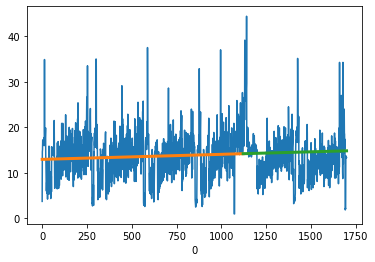

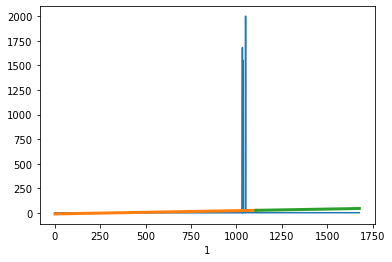

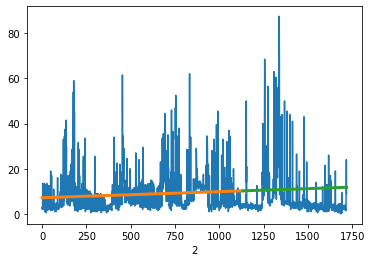

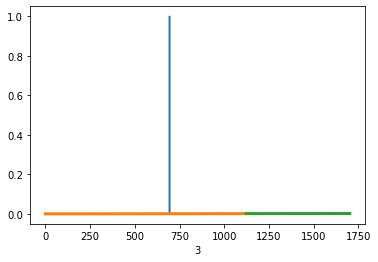

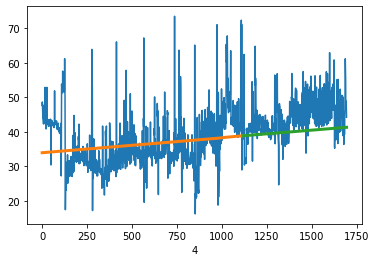

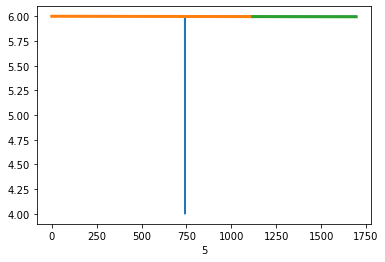

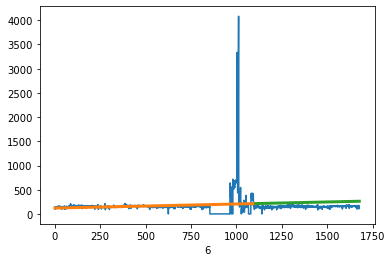

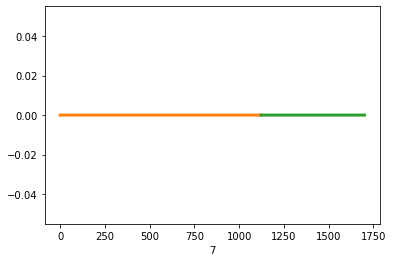

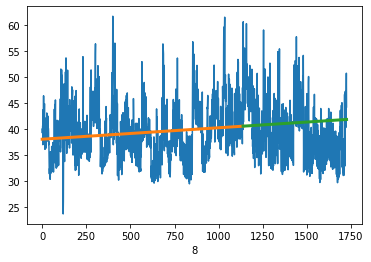

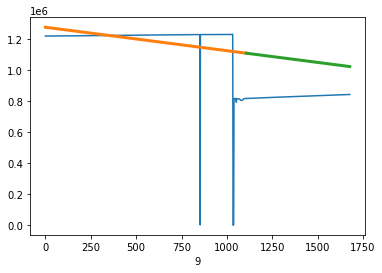

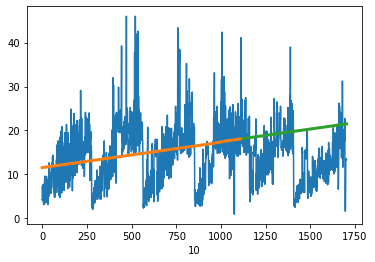

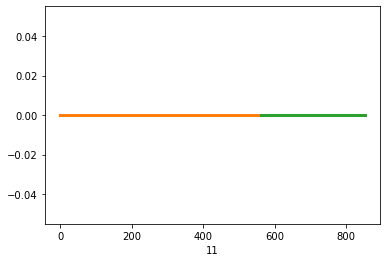

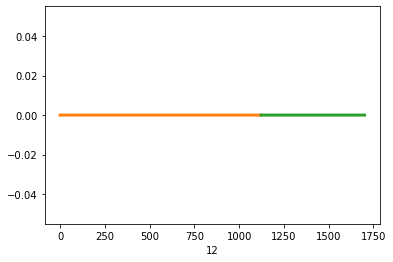

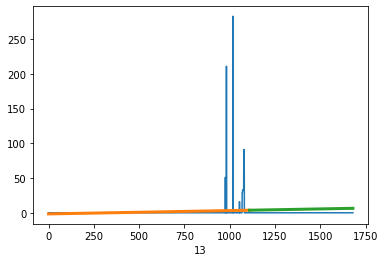

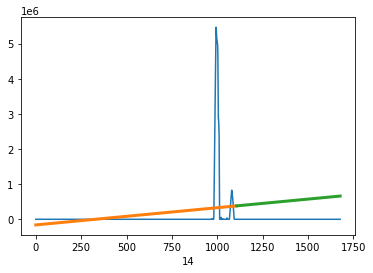

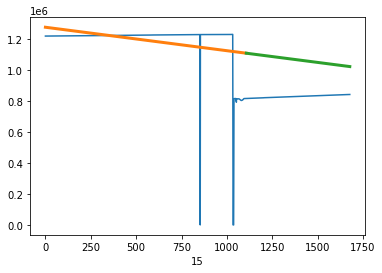

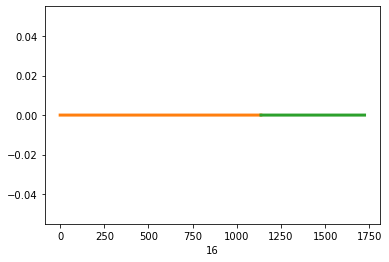

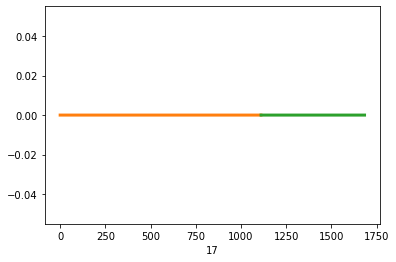

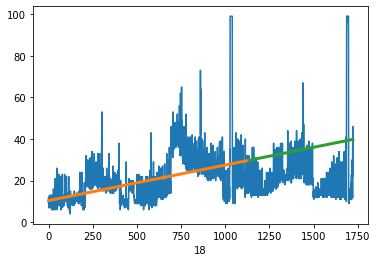

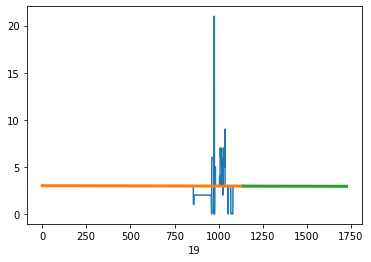

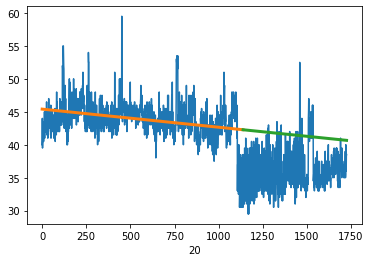

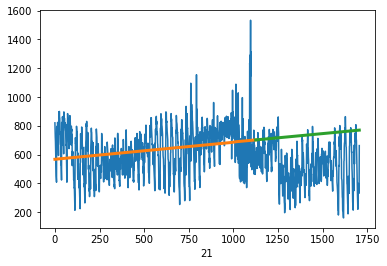

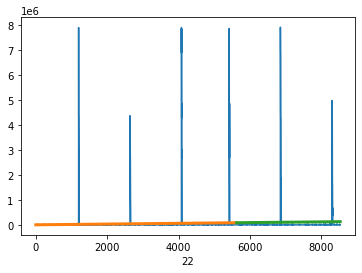

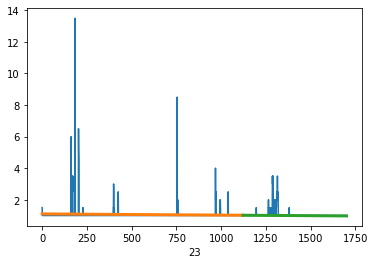

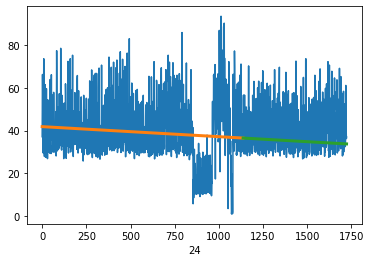

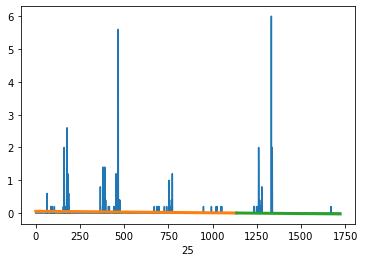

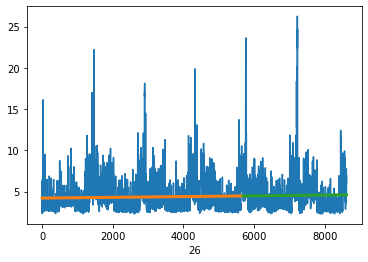

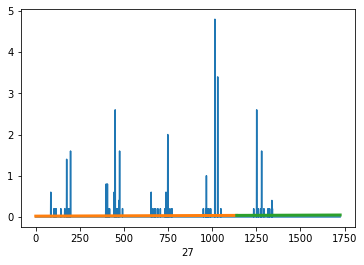

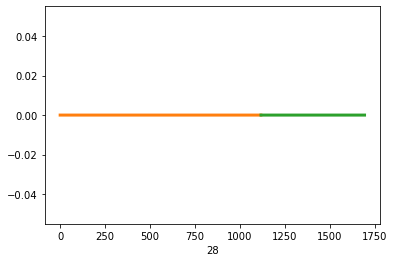

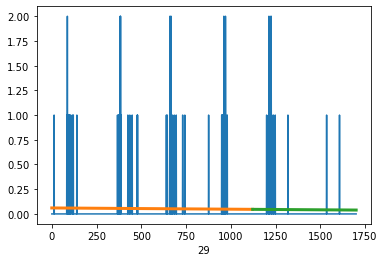

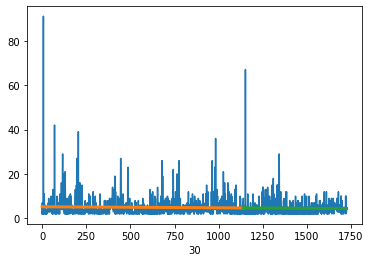

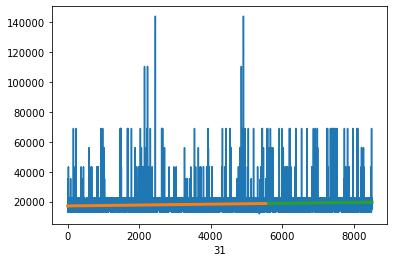

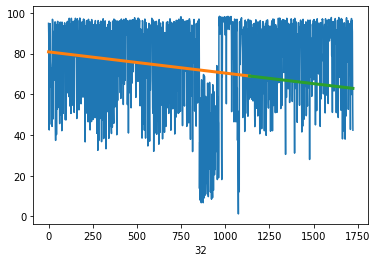

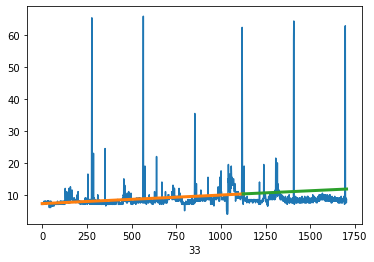

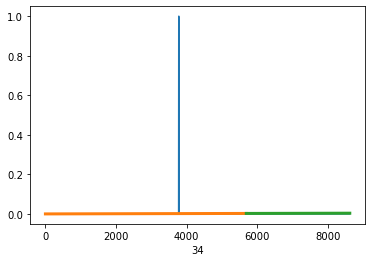

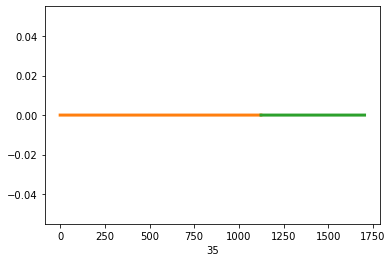

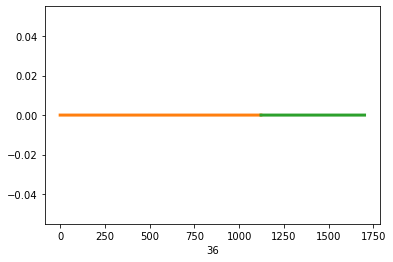

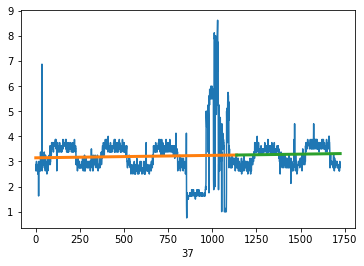

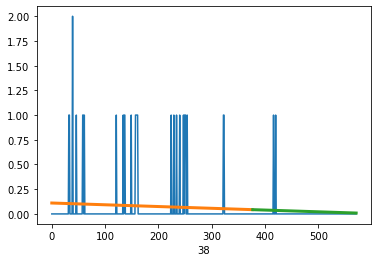

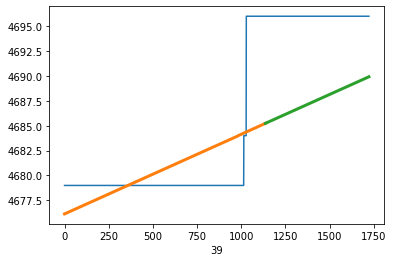

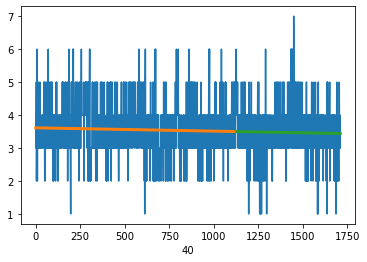

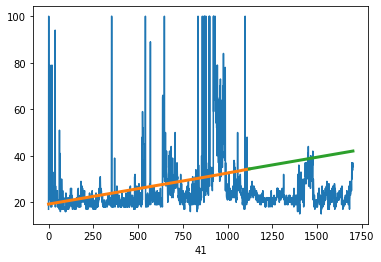

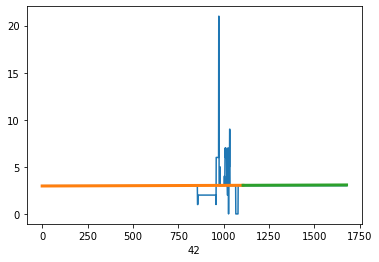

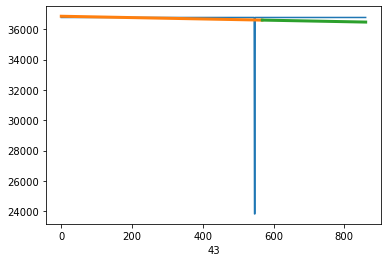

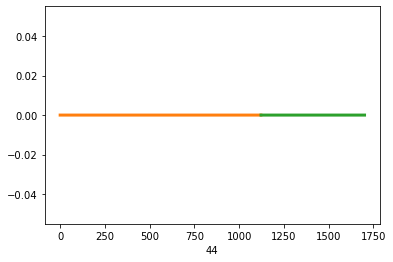

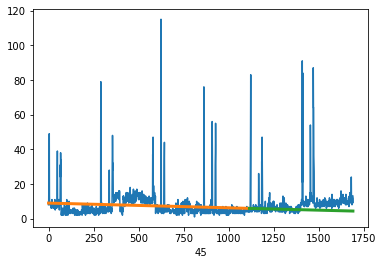

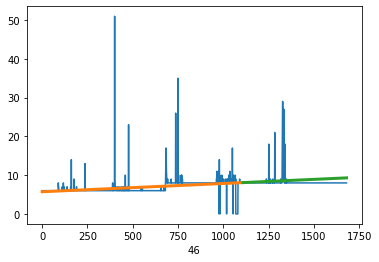

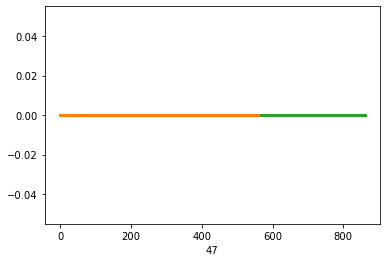

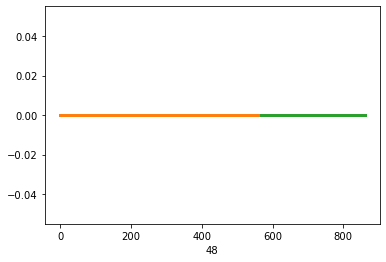

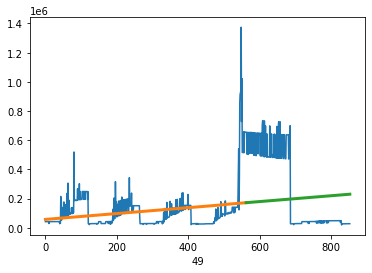

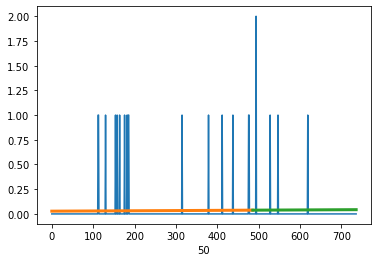

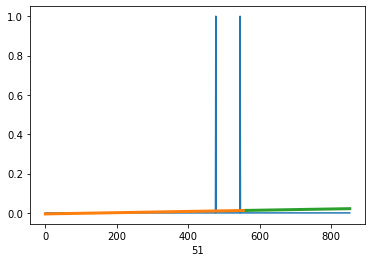

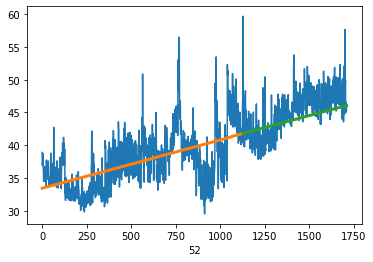

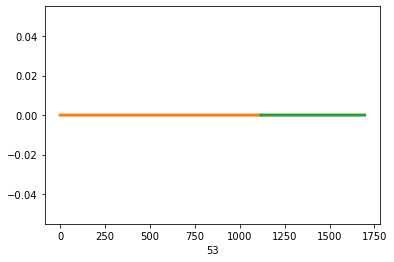

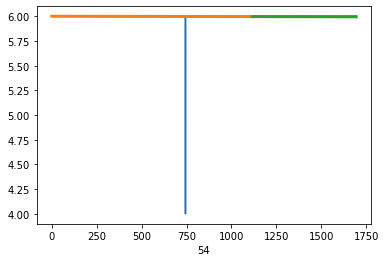

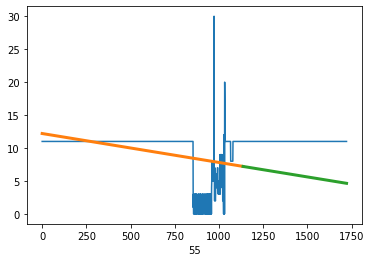

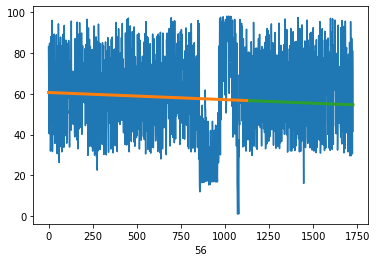

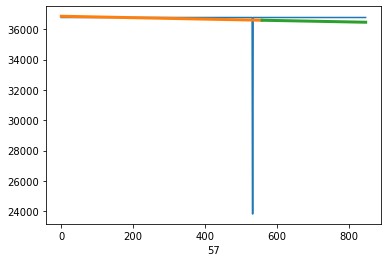

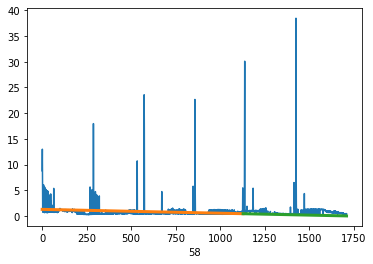

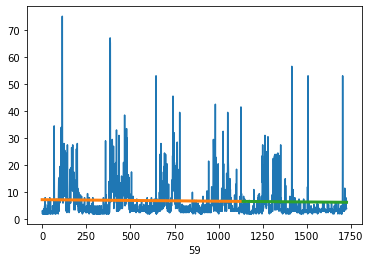

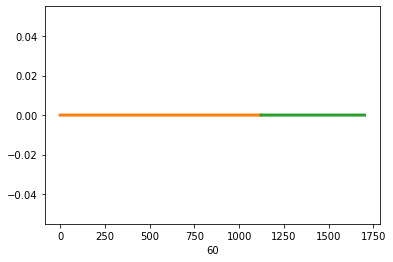

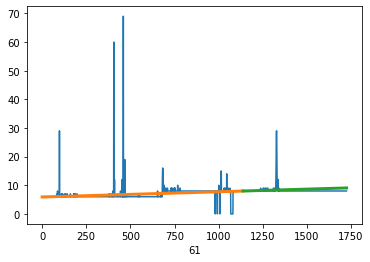

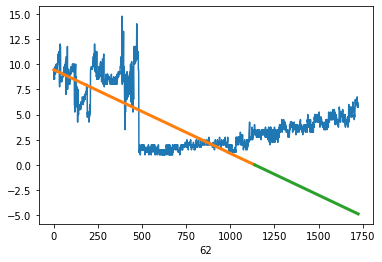

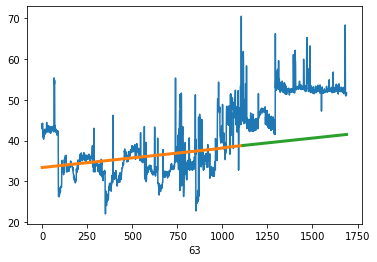

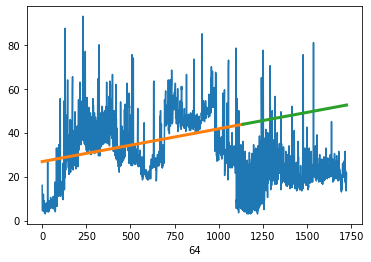

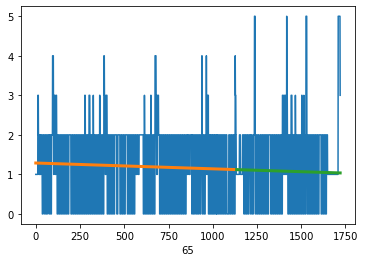

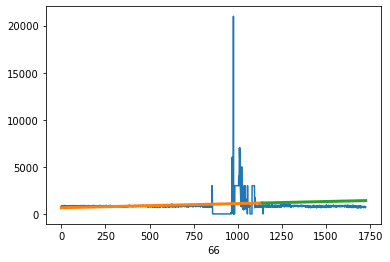

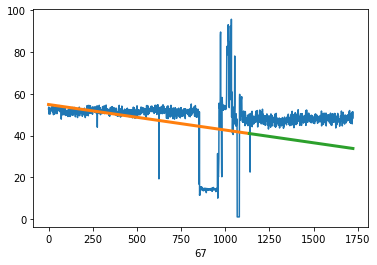

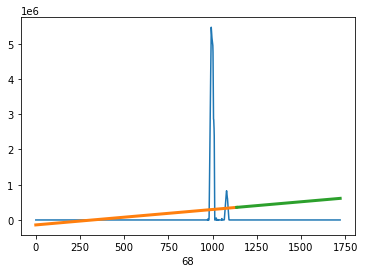

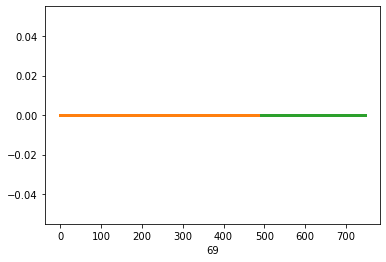

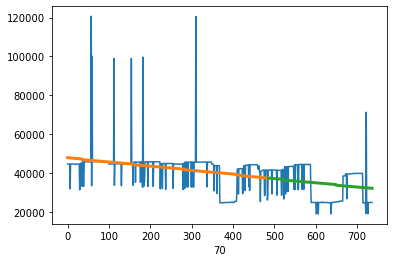

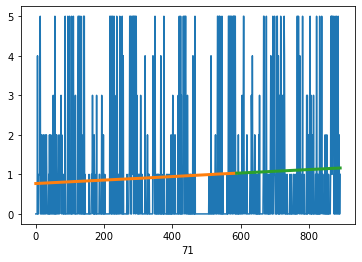

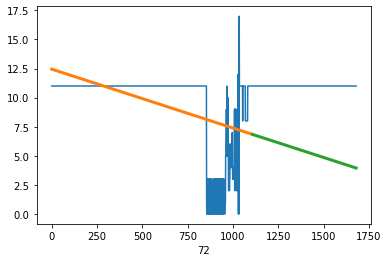

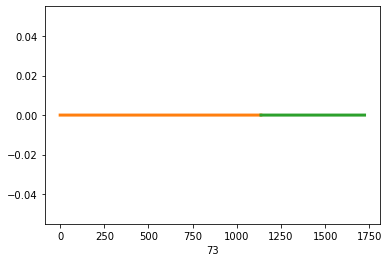

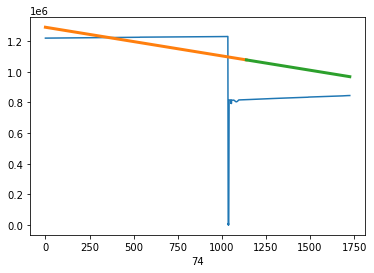

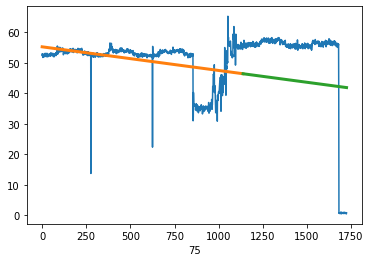

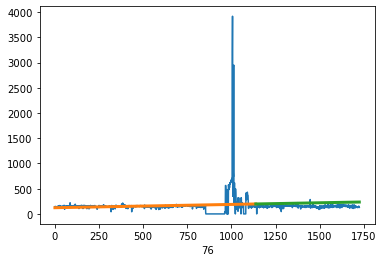

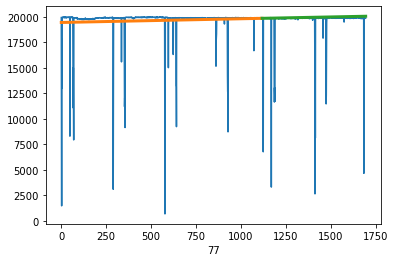

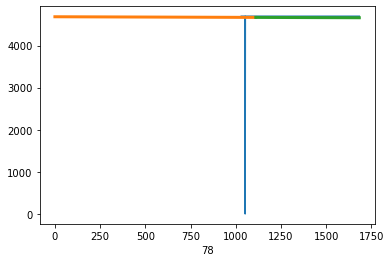

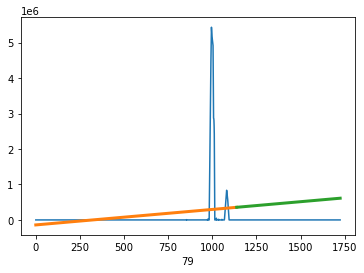

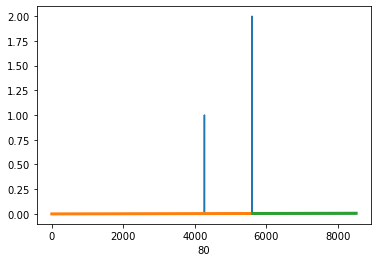

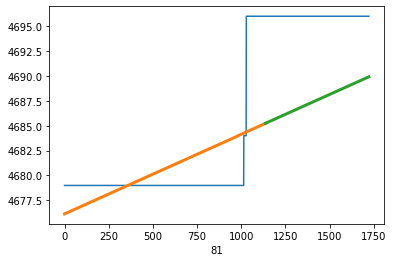

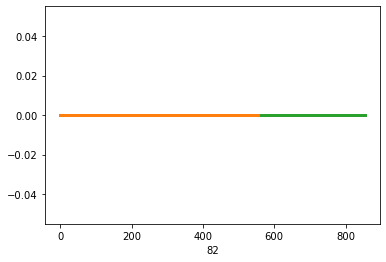

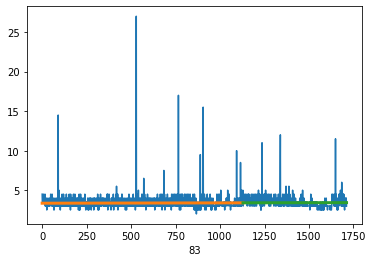

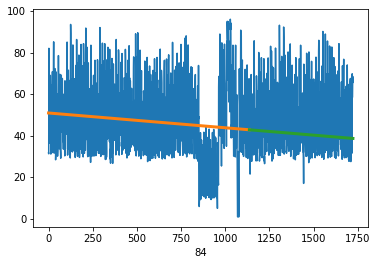

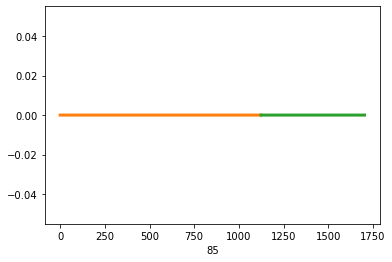

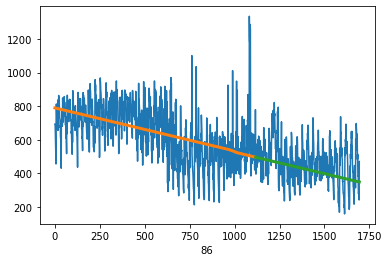

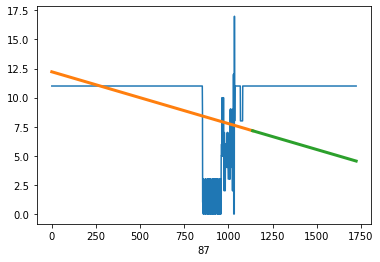

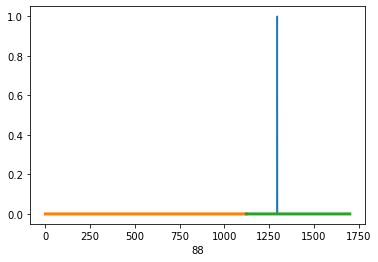

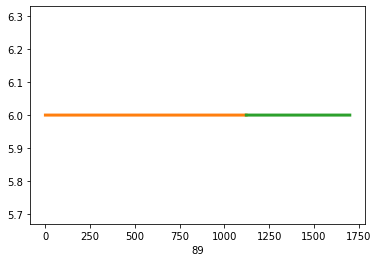

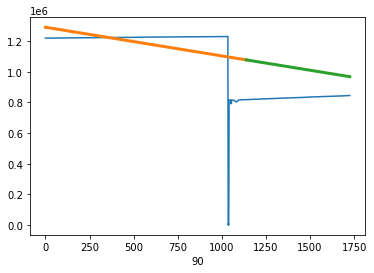

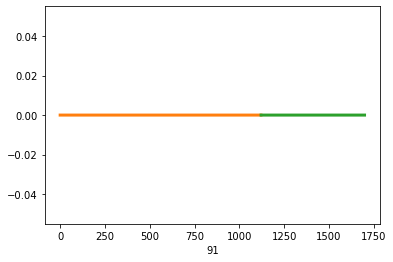

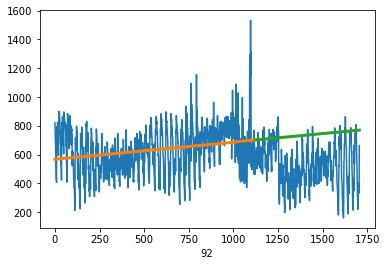

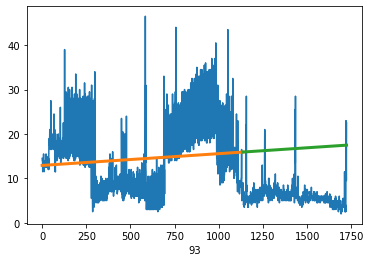

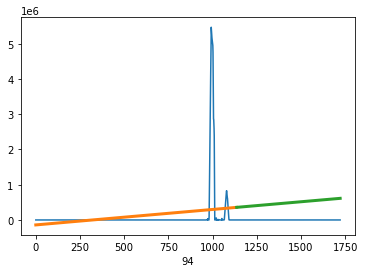

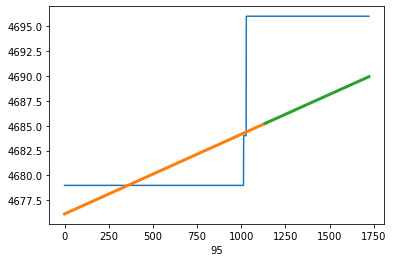

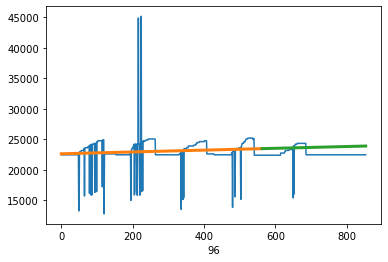

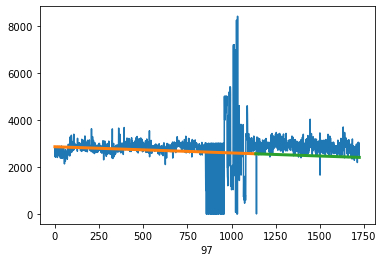

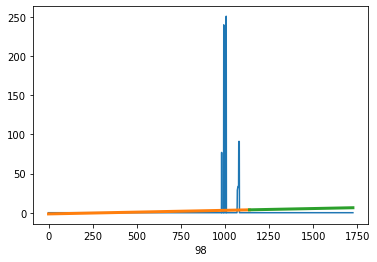

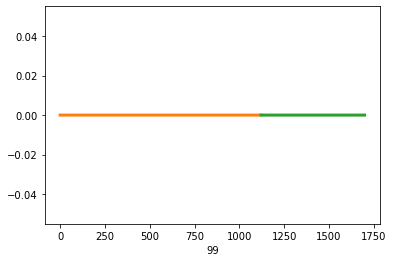

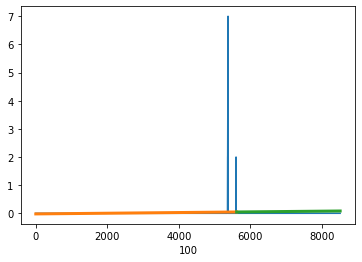

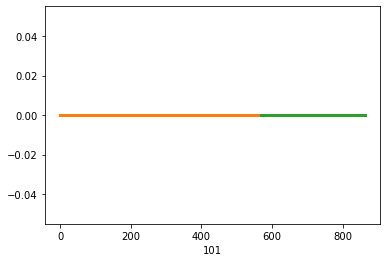

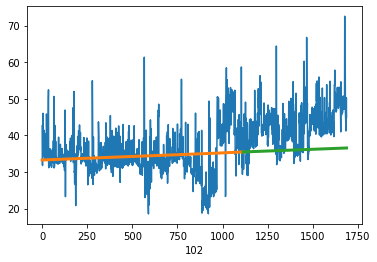

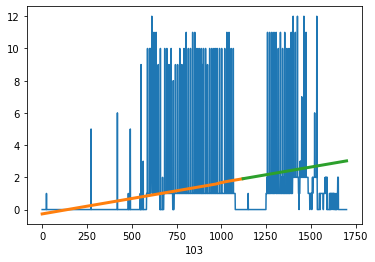

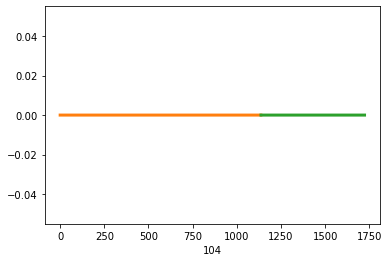

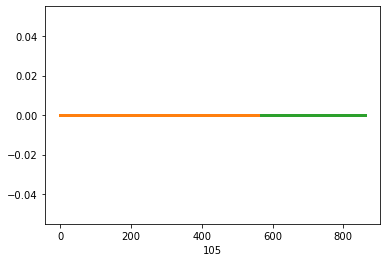

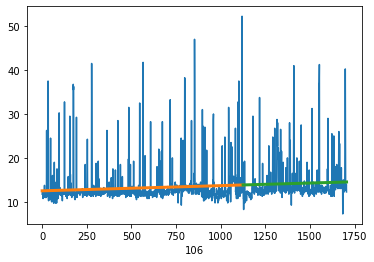

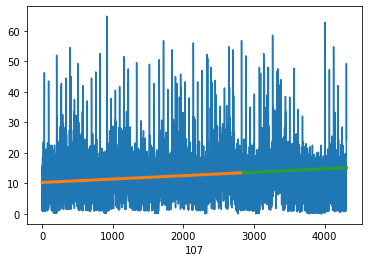

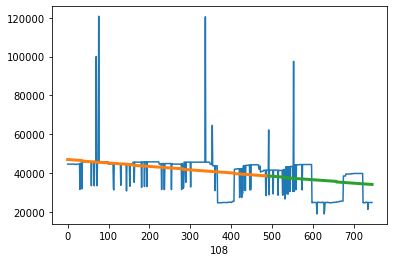

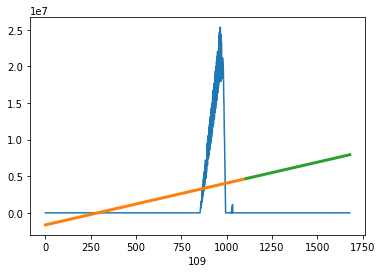

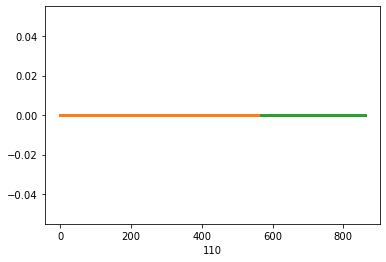

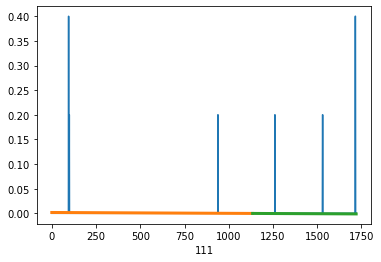

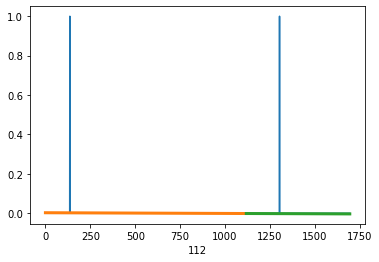

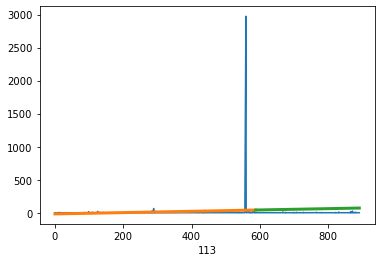

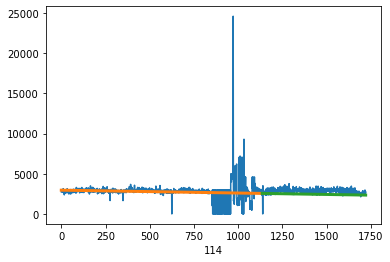

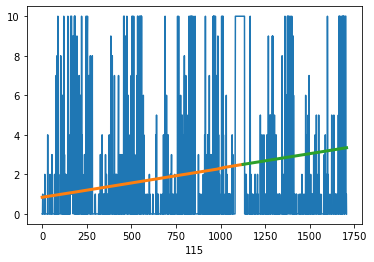

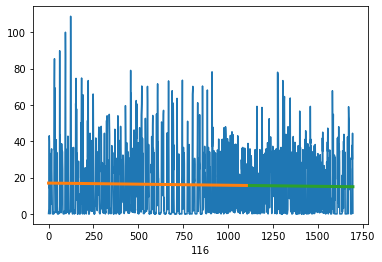

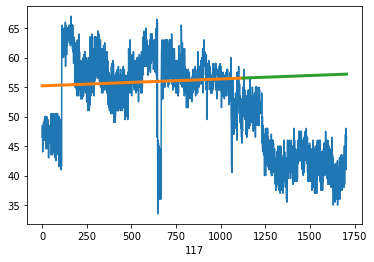

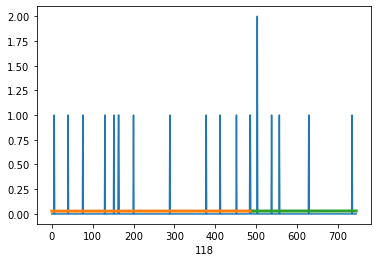

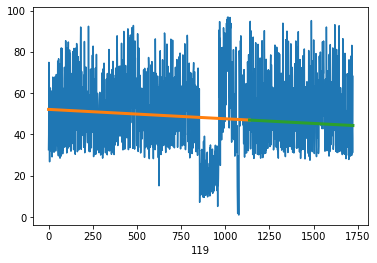

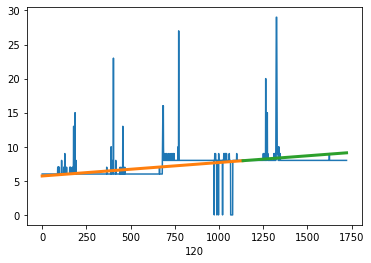

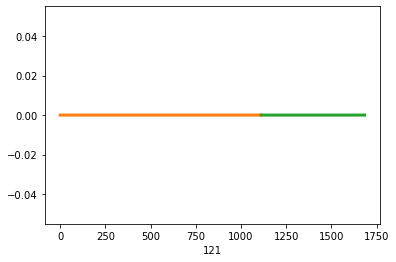

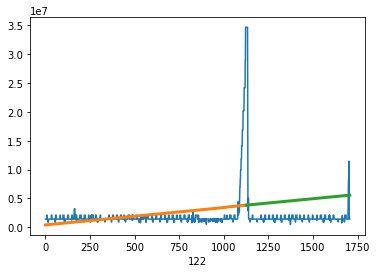

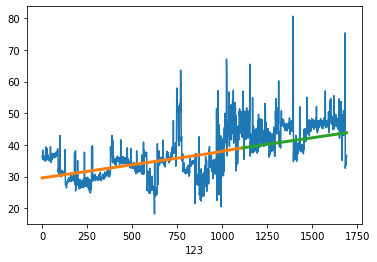

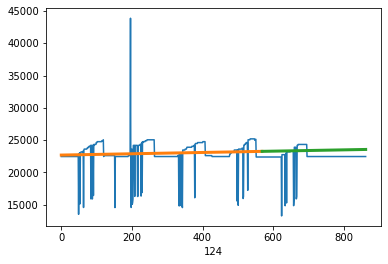

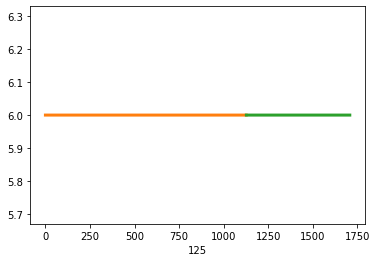

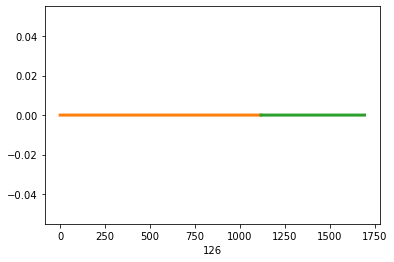

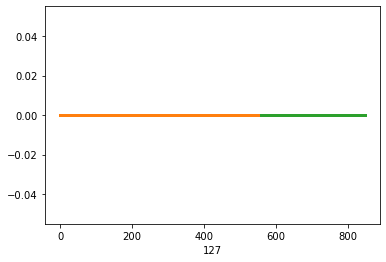

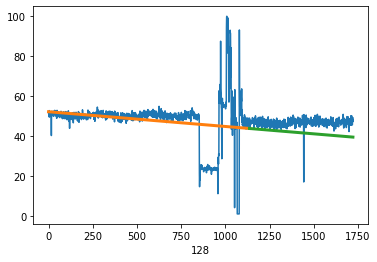

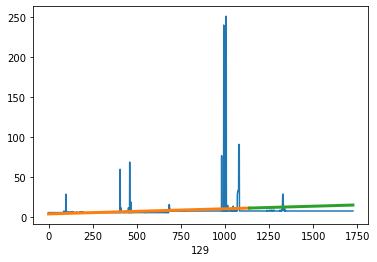

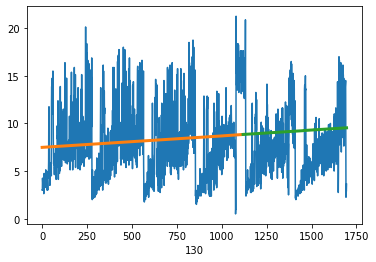

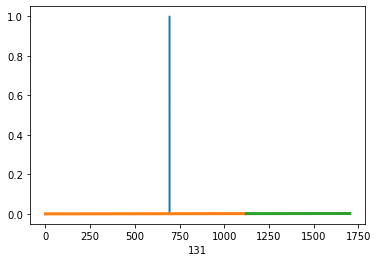

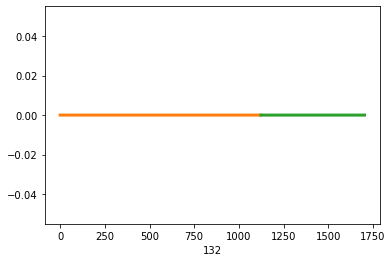

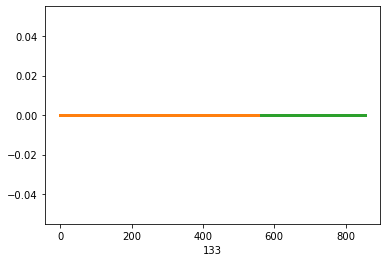

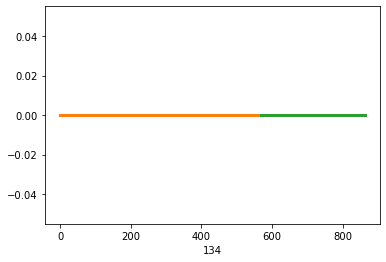

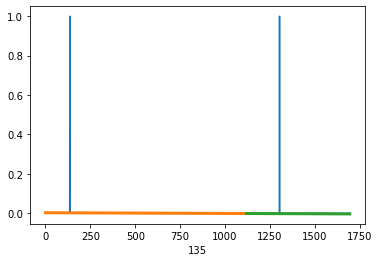

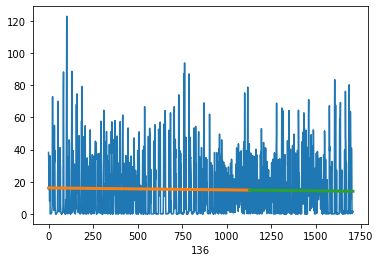

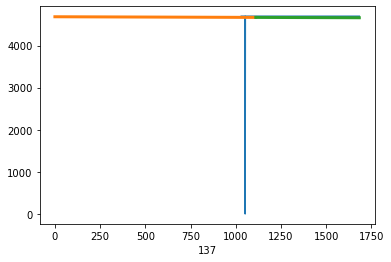

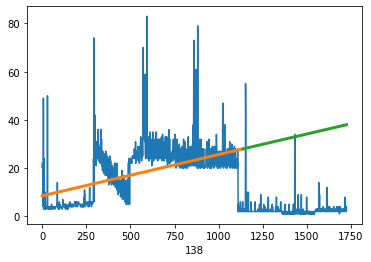

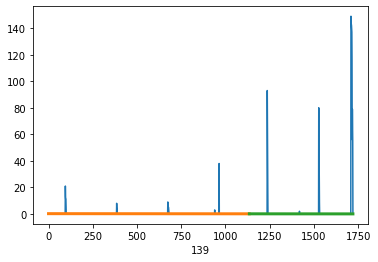

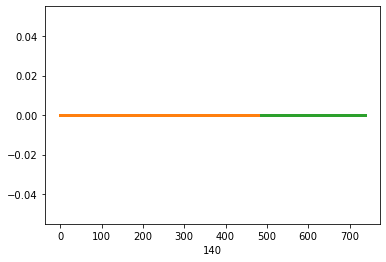

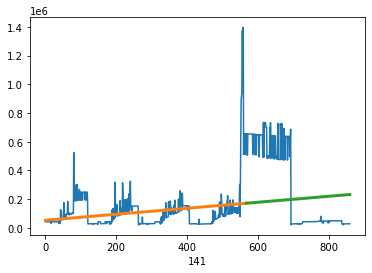

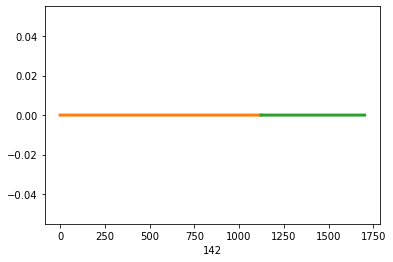

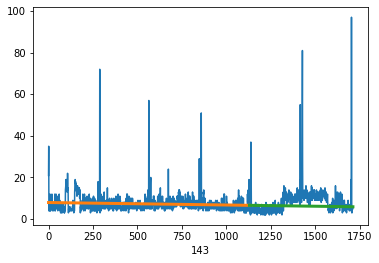

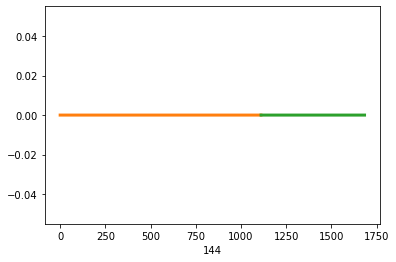

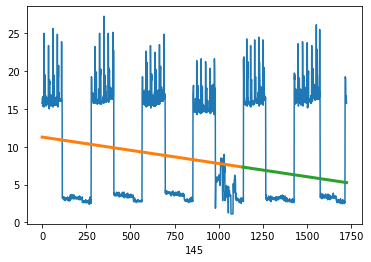

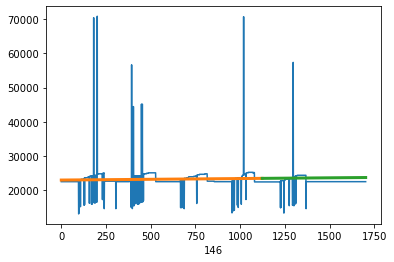

In [ ]:
# Plot outputs
for i in range(len(keys_id)):
    indx = keys_id[i]
    fig, ax = plt.subplots()
    # shift train predictions for plotting
    trainPlot = np.empty_like(dic_id[indx][1].reshape(-1,1))
    trainPlot[:, :] = np.nan
    trainPlot[:len(dic_id[indx][3][2]), :] = dic_id[indx][3][2].reshape(-1,1)
    # shift test predictions for plotting
    validPlot = np.empty_like(dic_id[indx][1].reshape(-1,1))
    validPlot[:, :] = np.nan
    validPlot[len(dic_id[indx][3][2]):len(dic_id[indx][1]), :] = dic_id[indx][4][2].reshape(-1,1)
    # plot baseline and predictions
    ax.set_xlabel(str(i))
    ax.plot(dic_id[indx][1].reshape(-1,1))
    ax.plot(trainPlot, linewidth=3)
    ax.plot(validPlot, linewidth=3)
plt.show

In [ ]:
l = []
for indx_name in keys_name:
    somme = 0
    cptr = 0
    for indx_id in dic_name[indx_name]:
        somme += dic_id[indx_id][1]
        cptr += 1
    l.append(somme/cptr)
    
dic = {'metric_name':keys_name, 'r2_mean':l}
r2 = pd.DataFrame(dic)
r2

In [ ]:
plt.scatter(dic_id[keys_id[0]][3][0], dic_id[keys_id[0]][3][1],  color='black')
plt.plot(dic_id[keys_id[0]][3][0], dic_id[keys_id[0]][3][2], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# ts_data = pd.read_csv('data/it-data-4metrics.csv', sep=',')
# dd = ts_data.to_dict()
# dd